<a href="https://colab.research.google.com/github/ltbatista/machine-learning/blob/master/KNN_Iris_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Abaixo um modelo de K-Nearest Neighbors para analisar o conjunto de dados Iris de acordo com o aprendizado no livro abaixo:
#### https://www.amazon.com/Introduction-Machine-Learning-Python-Scientists/dp/1449369413


Importando as bibliotecas


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
# import mglearn

%matplotlib inline

Conferindo se as versões das bibliotecas e do python são muito distintas do que o autor do livro está usando

In [3]:
import sys
print("Python version: {}".format(sys.version))
import pandas as pd
print("pandas version: {}".format(pd.__version__))
import matplotlib
print("matplotlib version: {}".format(matplotlib.__version__))
import numpy as np
print("NumPy version: {}".format(np.__version__))
import scipy as sp
print("SciPy version: {}".format(sp.__version__))
import IPython
print("IPython version: {}".format(IPython.__version__))
import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))

Python version: 3.6.8 (default, Oct  7 2019, 12:59:55) 
[GCC 8.3.0]
pandas version: 0.25.2
matplotlib version: 3.1.1
NumPy version: 1.17.3
SciPy version: 1.3.1
IPython version: 5.5.0
scikit-learn version: 0.21.3


Montando o disco para salvar conteúdos no meu google drive e para o que eu tiver no meu Google Drive, pois estou usando Colab

In [6]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Importando o conjunto de dados e analisando o formato dos dados 

In [0]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [9]:
print("Keys of iris_dataset: \n{}".format(iris_dataset.keys()))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [10]:
print(iris_dataset['DESCR'][:193]+"\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [12]:
print("Target names: {}".format(iris_dataset['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


In [13]:
print("Feature names: {}".format(iris_dataset['feature_names']))

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [14]:
print("Type of data: {}".format(type(iris_dataset['data'])))

Type of data: <class 'numpy.ndarray'>


In [15]:
print("Shape of data: {}".format(iris_dataset['data'].shape))

Shape of data: (150, 4)


In [16]:
print("First five columns of data:\n{}".format(iris_dataset['data'][:5]))

First five columns of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [20]:
print("Type of target: {}".format(type(iris_dataset['target'])))

Type of target: <class 'numpy.ndarray'>


In [21]:
print("Shape of target: {}".format(iris_dataset['target'].shape))

Shape of target: (150,)


In [22]:
print("Target:\n{}".format(iris_dataset['target']))

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Repartindo o dataset em duas partes, a parte de Treino (train) e a parte de Teste (test), seguindo as convencoes da matematica f(x) = y, teremos X_train, X_test, y_train, y_test.

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
 iris_dataset['data'], iris_dataset['target'], random_state=0)

In [24]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (112, 4)
y_train shape: (112,)


In [26]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (38, 4)
y_test shape: (38,)


Abaixo criaremos um gráfico para tentar visualizar se há anomalias nos nossos dados, utilizando a visão, fica mais fácil definir qual o melhor modelo de Machine Learning devemos aplicar à nossa resolução

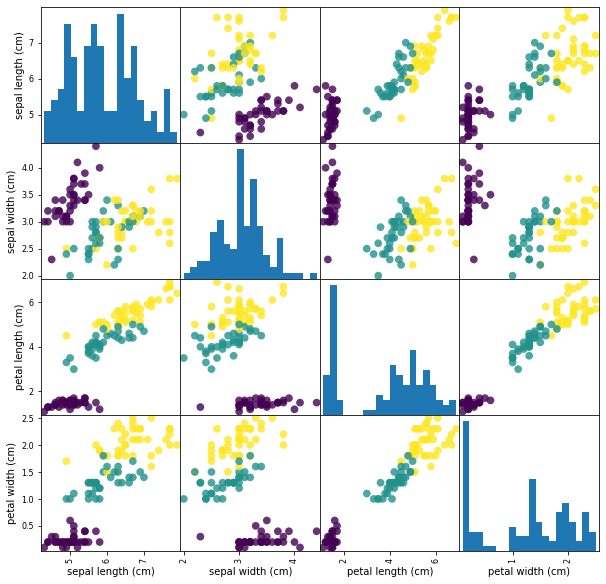

In [32]:
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# create a scatter matrix from the dataframe, color by y_train
grr = scatter_matrix(iris_dataframe, c=y_train, figsize=(10, 10), marker='o',
 hist_kwds={'bins': 20}, s=60, alpha=.8)

Conforme identificamos na imagem acima, temos três características bem definidas então será possível que nosso modelo de KNN seja aplicado

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [34]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

Fazendo a primeira predição, vamos inserir um valor aleatorio com Sepal Length 5, Sepal Width 2.9, Petal Length 1 e Petal Width de 0.2.

In [35]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


In [37]:
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


Agora iremos fazer a validação do modelo desenvolvido

In [38]:
y_pred = knn.predict(X_test)
print("Test set predicions:\n{}".format(y_pred))

Test set predicions:
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


Agora nós comparamos os valores acima com o que tem no nosso conjunto de teste

In [40]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.97


Acima podemos notar que tivemos um resultado de 97% de precisão

É possível calcular a precisão do modelo usando um método do objeto knn

In [41]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97
